# Effort and cost Estimation in Agile Software Development

In [2]:
#@title Effort Estimation on Maxwell
import math
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from matplotlib.colors import ListedColormap  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

from sklearn.metrics import classification_report

#data_read = pd.read_csv('/content/drive/MyDrive/Btp/Ultra/special work/datasets/desharnais.csv')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data_read = pd.read_csv('/content/drive/MyDrive/Btp/Ultra/special work/datasets/desharnais.csv')

In [5]:
data_read.head()

,id,Project,TeamExp,ManagerExp,YearEnd,Length,Effort,Transactions,Entities,PointsNonAdjust,Adjustment,PointsAjust,Language
0,1,1,1,4,85,12,5152,253,52,305,34,302,1
1,2,2,0,0,86,4,5635,197,124,321,33,315,1
2,3,3,4,4,85,1,805,40,60,100,18,83,1
3,4,4,0,0,86,5,3829,200,119,319,30,303,1
4,5,5,0,0,86,4,2149,140,94,234,24,208,1


In [6]:
#@title Defining Category 1 and Category 2


features = [	'TeamExp','ManagerExp','Length' ,	'Transactions',	'Entities',	'PointsNonAdjust',	'Adjustment',	'PointsAjust']




Cat_1 = data_read[features]
Cat_2 = data_read['Effort']

In [7]:
#For Debugging Purpose
 
##Cat_1=data_read.drop(['Actual_Cost'],axis=1).values
#Cat_1=data_read(db_a).values
#Cat_1=data_read['Effort',	'Vi',	'D',	'V',	'Sprint_Size',	'Work_days',	'Team_Salary',	'Act_Time',	'Est_time'].values
##Cat_2=data_read['Actual_Cost'].values



#@title Describing Categorical Data 
Cat_1.describe()


,TeamExp,ManagerExp,Length,Transactions,Entities,PointsNonAdjust,Adjustment,PointsAjust
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,2.185185,2.530864,11.666667,182.123457,122.333333,304.456790,27.629630,289.234568
std,1.415195,1.643825,7.424621,144.035098,84.882124,180.210159,10.591795,185.761088
min,-1.000000,-1.000000,1.000000,9.000000,7.000000,73.000000,5.000000,62.000000
25%,1.000000,1.000000,6.000000,88.000000,57.000000,176.000000,20.000000,152.000000
50%,2.000000,3.000000,10.000000,140.000000,99.000000,266.000000,28.000000,255.000000
75%,4.000000,4.000000,14.000000,224.000000,169.000000,384.000000,35.000000,351.000000
max,4.000000,7.000000,39.000000,886.000000,387.000000,1127.000000,52.000000,1116.000000


In [8]:
#For debugging purpose
#print(Cat_1)

In [9]:
#@title Describe the raw Data of splitted trained set from the dataframe
display(Cat_1)

,TeamExp,ManagerExp,Length,Transactions,Entities,PointsNonAdjust,Adjustment,PointsAjust
0,1,4,12,253,52,305,34,302
1,0,0,4,197,124,321,33,315
2,4,4,1,40,60,100,18,83
3,0,0,5,200,119,319,30,303
4,0,0,4,140,94,234,24,208
...,...,...,...,...,...,...,...,...
76,4,4,12,229,169,398,39,414
77,4,3,12,227,73,300,34,297
78,4,4,24,395,193,588,40,617
79,4,3,12,469,176,645,43,697


In [10]:
print('The overall number of projects are: ',len(Cat_2))

The overall number of projects are:  81


In [11]:
display(Cat_2)

0      5152
1      5635
2       805
3      3829
4      2149
      ...  
76     1400
77     2800
78     9520
79     5880
80    23940
Name: Effort, Length: 81, dtype: int64

In [12]:


from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(Cat_1,Cat_2,test_size=0.20, random_state=0)
from sklearn.linear_model import LinearRegression
ml = LinearRegression()
ml.fit(x_train,y_train)
ml.predict(x_test)
y_pred1 = ml.predict(x_test)

ypredx=len(x_test)
## For Debugging Purpose


# print(len(y_pred1))
# print('xtrain',len(x_train))
# print('xtest',len(x_test))

In [13]:
import math
print(y_test)


22    5775
27    4277
61    1876
13    4172
71    2275
74    3941
30    3927
55    8232
53    2583
26    3542
50    2989
42    2174
48    2331
33    6405
73     595
2      805
57    2723
Name: Effort, dtype: int64


In [14]:
print(y_pred1)

[ 5287.01542534 10645.31365857  1168.44060921  2616.43733912
  3069.43753661  8050.96965221  2261.54896184  5131.81182405
  4091.84747422  6190.38401373  1883.18007399  3356.26904025
  1372.91167033  4054.991936     869.40622036  -399.51226931
  1830.3592158 ]


In [15]:
ml.predict(x_train)
x_train_pred_lr= ml.predict(x_train)

In [16]:
from sklearn.metrics import r2_score


import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math




print('The r Score on the predictrd trained Set: %.2f'% r2_score(y_test,y_pred1))

diff=np.absolute(y_test-y_pred1)
MRE=diff/y_test
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
Pred=(P.size/MRE.size) * 100
print("MMRE",MMRE)
print("MdMRE",MdMRE)
print("PRED 25%",Pred)

#linear effort

The r Score on the predictrd trained Set: -0.52
MMRE 0.577948449283196
MdMRE 0.41102030444937193
PRED 25% 5.88235294117647


In [17]:

#   diff=np.absolute(y_test-y_pred1)
#   MRE=diff/y_test
#   MMRE=np.mean(MRE)

# print('MMRE :',MMRE)

Text(0.5, 1.0, 'Effort Actual vs Predicted Linear Regresssion')

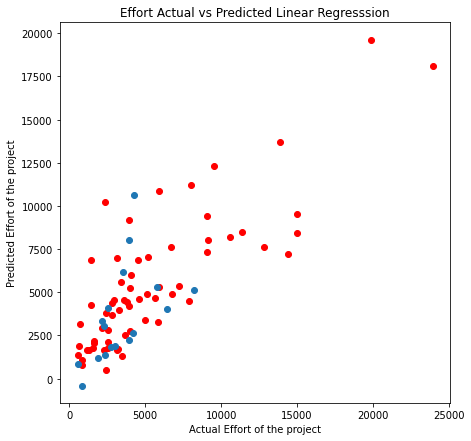

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.scatter(y_train, x_train_pred_lr ,label='Train Data',color='red' )
plt.scatter(y_test, y_pred1)


#plt.scatter()
plt.xlabel('Actual Effort of the project')
plt.ylabel('Predicted Effort of the project')
plt.title('Effort Actual vs Predicted Linear Regresssion')




In [19]:
##Debugging pur   
arr =pd.DataFrame({'Actual  Cost':y_test })
arr1 =pd.DataFrame({'Predicted Cost':y_pred1})

# Now calculating Diffrence between actual and predicted Values

In [20]:
import pandas as pd
pred_y_diff = pd.DataFrame({'Actual Values of Cost':y_test,'Predicted Cost':y_pred1,'Difference':y_test-y_pred1})

#print(pred_y_diff.dtypes)
#
#pred_y_diff= pd.DataFrame(range(3), columns=['y_pred1'])
#pred_y_diff.y_pred1 = pred_y_diff.y_pred1.astype(float)


pred_y_diff[0:21]


,Actual Values of Cost,Predicted Cost,Difference
22,5775,5287.015425,487.984575
27,4277,10645.313659,-6368.313659
61,1876,1168.440609,707.559391
13,4172,2616.437339,1555.562661
71,2275,3069.437537,-794.437537
74,3941,8050.969652,-4109.969652
30,3927,2261.548962,1665.451038
55,8232,5131.811824,3100.188176
53,2583,4091.847474,-1508.847474
26,3542,6190.384014,-2648.384014


In [21]:
#arr = pred_y_diff.to_numpy()
arr =pd.DataFrame({'Actual  Cost':y_test })
arr1 =pd.DataFrame({'Predicted Cost':y_pred1})
arr2 =pd.DataFrame({'Difference':y_test-y_pred1})

In [22]:

print(arr)

    Actual  Cost
22          5775
27          4277
61          1876
13          4172
71          2275
74          3941
30          3927
55          8232
53          2583
26          3542
50          2989
42          2174
48          2331
33          6405
73           595
2            805
57          2723


In [23]:
print(np.absolute(arr2))

     Difference
22   487.984575
27  6368.313659
61   707.559391
13  1555.562661
71   794.437537
74  4109.969652
30  1665.451038
55  3100.188176
53  1508.847474
26  2648.384014
50  1105.819926
42  1182.269040
48   958.088330
33  2350.008064
73   274.406220
2   1204.512269
57   892.640784


In [24]:
arr22= [];
arr11=[];
i=1
k=1
for i in arr:
  xx= arr[i]
  arr22.append(xx)
for k in arr1:
  yy= arr1[k]
  arr11.append(yy)

In [25]:
#print(arr22[0][0])
#print(arr11[0][0])
print(len(arr11))
Diff=[];
i=0
#for i in range(0,5):
   # vv=arr22[0][i]-arr11[0][i]
#    Diff.append(vv)
#    print(vv)

1


In [26]:
#pred_y_diff = pd.DataFrame({'Actual  Cost':y_test,'Predicted Cost':y_pred1,'Difference':y_test-y_pred1,'MMRE':1/6((y_test-y_pred1)/y_test) })

In [27]:
# @title KNeiboursRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

#print('x_train length :',len(x_train))
x_train,x_test,y_train,y_test = train_test_split(Cat_1,Cat_2, test_size=0.20, random_state=0)
#print(len(y_pred1))
#print('x_train length:',len(x_train))
#print('x_test length:',len(x_test))

neigh = KNeighborsRegressor(n_neighbors=3, weights='uniform')
neigh.fit(x_train,y_train)
y_pred=neigh.predict(x_test) 

#print(classification_report(y_test,y_pred))

#predict =neigh.predict(y_pred)
#print(neigh.score(y_test, y_pred))

import numpy as np
from sklearn.metrics import mean_absolute_error
#

# The r_sq
print('The r Score on the predictrd trained Set: %.2f'% r2_score(y_test,y_pred))

diff=np.absolute(y_test-y_pred)
MRE=diff/y_test
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
Pred=(P.size/MRE.size) * 100
print("MMRE",MMRE)
print("MdMRE",MdMRE)
print("PRED 25%",Pred)


#KNN EFFORT

The r Score on the predictrd trained Set: -1.25
MMRE 0.9118257374213622
MdMRE 0.41041041041041043
PRED 25% 29.411764705882355


In [28]:
pred_mre = pd.DataFrame({'Actual Values of Cost':y_test,'Predicted Cost':y_pred,'MRE':(y_test-y_pred)/y_test})


pred_mre[0:21]

,Actual Values of Cost,Predicted Cost,MRE
22,5775,9254.000000,-0.602424
27,4277,12943.000000,-2.026187
61,1876,1612.333333,0.140547
13,4172,2303.000000,0.447987
71,2275,1734.666667,0.237509
74,3941,6790.000000,-0.722913
30,3927,4036.666667,-0.027926
55,8232,7639.333333,0.071995
53,2583,2466.333333,0.045167
26,3542,4799.666667,-0.355072


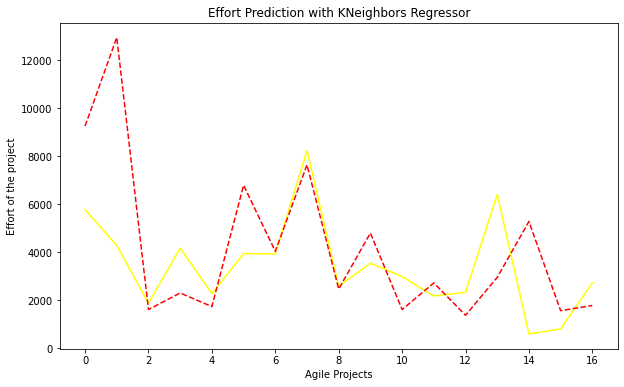

In [29]:
 #plotting the observed and predicted values 


# Setting the boundaries and parameters

plt.rcParams['figure.figsize'] = (10,6)
x_ax =range(len(x_test))
#x_ax2 =range(len(y_test))
#plotting 
plt.plot(x_ax, y_test , label='Actual Observed Value', color='yellow',linestyle='-')
plt.plot(x_ax,y_pred , label='Predicted values ' , color='red' , linestyle ='--')

plt.xlabel('Agile Projects')
plt.ylabel('Effort of the project')
plt.title('Effort Prediction with KNeighbors Regressor')
#plt.legend(bbox_to_anchor =(0.5,-0.2), loc= 'upper center',ncol=2, frameon = True)

plt.show()

----------------------------

In [30]:
# #@title CALCULATING THE MMRE

# #MAKING THE VALUES ABSOLUTE 
# xyy=pred_mre.MRE.abs()
# Raw_mean = xyy.sum()/len(pred_mre) #Total Projects in the Dataset are 21
# #print('MMRE :',Raw_mean)

# # percentage MMRE 
# print(Raw_mean)
# #print('Percentage MMRE :',Raw_mean*100)

Decision Tree Implementation

## Decision Tree Implementation 

In [31]:
data_read.head()

,id,Project,TeamExp,ManagerExp,YearEnd,Length,Effort,Transactions,Entities,PointsNonAdjust,Adjustment,PointsAjust,Language
0,1,1,1,4,85,12,5152,253,52,305,34,302,1
1,2,2,0,0,86,4,5635,197,124,321,33,315,1
2,3,3,4,4,85,1,805,40,60,100,18,83,1
3,4,4,0,0,86,5,3829,200,119,319,30,303,1
4,5,5,0,0,86,4,2149,140,94,234,24,208,1


In [32]:
#Now to Prepare the Input and Output Features
X= data_read.drop(['Effort'],axis=1)
X.shape

(81, 12)

In [33]:
#Splitting the dataset into Trainingfset and test set

#Splitting the dataset
X_train,X_test,y_train,y_test = train_test_split(Cat_1,Cat_2, test_size=0.20 ,random_state=0)


In [34]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
#Creating and Fitting the model
regressor1 = DecisionTreeRegressor().fit(X_train,y_train)

In [35]:
#The Coeffitient of Detern=mination 
print('Training R_sq is : %.2f'% regressor1.score(X_train,y_train))

Training R_sq is : 1.00


In [36]:
# For the training model EVALUATION
from  sklearn.metrics import mean_absolute_error , mean_squared_error, explained_variance_score , r2_score

In [37]:
#prediction on the training Dataset
y_train_pred = regressor1.predict(X_train)



In [38]:

# The r_sq
print('The r_sq  is: %.2f'% r2_score(y_train,y_train_pred))

The r_sq  is: 1.00


In [39]:
#prediction on testing the data
y_test_pred_dt = regressor1.predict(X_test)
print("Mean Squared Error::",mean_squared_error(y_test,y_test_pred_dt))
print("Mean Absolute Error::",mean_absolute_error(y_test,y_test_pred_dt))
xv= math.sqrt(mean_squared_error(y_test,y_test_pred_dt))
print("Root Mean Squared Error::",xv)

Mean Squared Error:: 3577544.588235294
Mean Absolute Error:: 1476.5882352941176
Root Mean Squared Error:: 1891.4398188246155


In [40]:
# The r_sq
print('The r Score on the predictrd trained Set: %.2f'% r2_score(y_test,y_test_pred_dt))



The r Score on the predictrd trained Set: 0.02


<function matplotlib.pyplot.show(*args, **kw)>

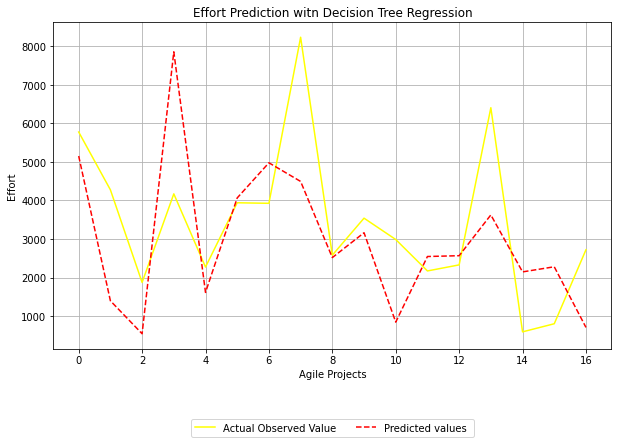

In [41]:
# plotting the observed and predicted values 


# Setting the boundaries and parameters

plt.rcParams['figure.figsize'] = (10,6)
x_ax =range(len(X_test))
#x_ax2 =range(len(y_test))
#plotting 
plt.plot(x_ax, y_test , label='Actual Observed Value', color='yellow',linestyle='-')
plt.plot(x_ax,y_test_pred_dt , label='Predicted values ' , color='red' , linestyle ='--')
plt.grid()
plt.xlabel('Agile Projects')
plt.ylabel('Effort')
plt.title('Effort Prediction witn Decision Tree Regression')
plt.legend(bbox_to_anchor =(0.5,-0.2), loc= 'upper center',ncol=2, frameon = True)

plt.show

In [42]:
pred_mre = pd.DataFrame({'Actual Values of Effort':y_test,'Predicted Effort':y_test_pred_dt,'MRE':(y_test-y_test_pred_dt)/y_test})
#rel=(xyy/5)
#print(sum(rel)/5)
pred_mre[0:21]

,Actual Values of Effort,Predicted Effort,MRE
22,5775,5152.0,0.107879
27,4277,1400.0,0.672668
61,1876,546.0,0.708955
13,4172,7854.0,-0.882550
71,2275,1617.0,0.289231
74,3941,4067.0,-0.031972
30,3927,4977.0,-0.267380
55,8232,4494.0,0.454082
53,2583,2520.0,0.024390
26,3542,3164.0,0.106719


CALCULATING MRE MMRE MdMRE and PRED 25

In [43]:
# The r_sq
print('The r Score on the predictrd trained Set: %.2f'% r2_score(y_test,y_test_pred_dt))

diff=np.absolute(y_test-y_test_pred_dt)
MRE=diff/y_test
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
Pred=(P.size/MRE.size) * 100
print("MMRE",MMRE)
print("MdMRE",MdMRE)
print("PRED 25%",Pred)

#DT EFFORT

The r Score on the predictrd trained Set: 0.02
MMRE 0.5974278530007034
MdMRE 0.43387978142076505
PRED 25% 35.294117647058826


In [44]:
import pandas as pd
pred_y_diff = pd.DataFrame({'Actual Values of Effort':y_test,'Predicted Effort':y_test_pred_dt,'Difference':y_test-y_test_pred_dt})

pred_y_diff[0:21]

,Actual Values of Effort,Predicted Effort,Difference
22,5775,5152.0,623.0
27,4277,1400.0,2877.0
61,1876,546.0,1330.0
13,4172,7854.0,-3682.0
71,2275,1617.0,658.0
74,3941,4067.0,-126.0
30,3927,4977.0,-1050.0
55,8232,4494.0,3738.0
53,2583,2520.0,63.0
26,3542,3164.0,378.0


In [45]:
#@title Random Forest Implementation
from sklearn.model_selection  import train_test_split
X_train,X_test,y_train,y_test = train_test_split(Cat_1,Cat_2, test_size=0.20 ,random_state=0)

In [46]:
from sklearn.ensemble import RandomForestRegressor
model2= RandomForestRegressor(n_estimators=30, random_state=30)

In [47]:
#Fitting the  model 
LL_rf = model2.fit(X_train,y_train)


In [48]:
#prediction on testing the data
y_test_pred_rf = model2.predict(X_test)

In [49]:
#Training Model Evaluation


print('The Model Score on the predictrd training Set: %.2f'% LL_rf.score(X_train,y_train))
print('r2 Score ', r2_score(y_test,y_test_pred_rf))

The Model Score on the predictrd training Set: 0.88
r2 Score  0.3502879004423334


In [50]:
print("Mean Squared Error::",mean_squared_error(y_test,y_test_pred_rf))
print("Mean Absolute Error::",mean_absolute_error(y_test,y_test_pred_rf))
xv= math.sqrt(mean_squared_error(y_test,y_test_pred_rf))
print("Root Mean Squared Error::",xv)

Mean Squared Error:: 2372046.9704575166
Mean Absolute Error:: 1177.7960784313727
Root Mean Squared Error:: 1540.1451134414303


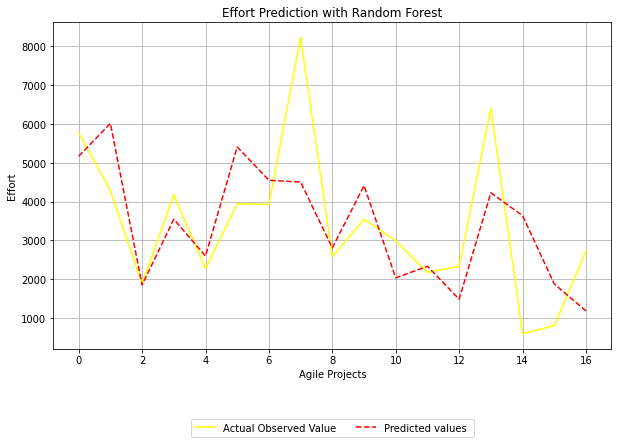

In [51]:
# plotting the observed and predicted values 


# Setting the boundaries and parameters

plt.rcParams['figure.figsize'] = (10,6)
x_ax =range(len(X_test))

#plotting 
plt.plot(x_ax, y_test , label='Actual Observed Value', color='yellow',linestyle='-')
plt.plot(x_ax,y_test_pred_rf , label='Predicted values ' , color='red' , linestyle ='--')
plt.grid()
plt.xlabel('Agile Projects')
plt.ylabel('Effort')
plt.title('Effort Prediction with Random Forest')
plt.legend(bbox_to_anchor =(0.5,-0.2), loc= 'upper center',ncol=2, frameon = True)

In [52]:
pred_mre = pd.DataFrame({'Actual Values of Cost':y_test,'Predicted Cost':y_test_pred_rf,'MRE':(y_test-y_test_pred_rf)/y_test})
#rel=(xyy/5)
#print(sum(rel)/5)
pred_mre[0:21]

,Actual Values of Cost,Predicted Cost,MRE
22,5775,5165.766667,0.105495
27,4277,6012.066667,-0.405674
61,1876,1851.033333,0.013308
13,4172,3544.333333,0.150447
71,2275,2595.700000,-0.140967
74,3941,5407.266667,-0.372054
30,3927,4546.733333,-0.157813
55,8232,4500.300000,0.453316
53,2583,2806.533333,-0.086540
26,3542,4410.233333,-0.245125


In [53]:
# The r_sq
print('The r Score on the predictrd trained Set: %.2f'% r2_score(y_test,y_test_pred_rf))

diff=np.absolute(y_test-y_test_pred_rf)
MRE=diff/y_test
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
Pred=(P.size/MRE.size) * 100
print("MMRE",MMRE)
print("MdMRE",MdMRE)
print("PRED 25%",Pred)



The r Score on the predictrd trained Set: 0.35
MMRE 0.6022790528905165
MdMRE 0.3195271551243448
PRED 25% 47.05882352941176


In [54]:
#@title CALCULATING THE MMRE

#MAKING THE VALUES ABSOLUTE 
xyy=pred_mre.MRE.abs()
Raw_mean = xyy.sum()/ypredx #Total Projects in the Dataset are 21
print('MMRE :',Raw_mean)

MMRE_RF = Raw_mean*100
# percentage MMRE 
###print(' MMRE in Percentage :',Raw_mean*100,'%')

MMRE : 0.6022790528905165


# Support Vector Machine

In [55]:
#@title Support Vector
#import warnings
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.model_selection import GridSearchCV


# Categorical To continious 
X_train,X_test,y_train,y_test = train_test_split(Cat_1,Cat_2, test_size=0.20, random_state=0)


svm = SVC(kernel="linear",C=1)
svm.fit(X_train,y_train)

#clf = svm.SVC()
#clf.fit(Cat_1, Cat_2)

y_pred_svm=svm.predict(X_test)
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
#
print("Mean Absolute error:::",np.sqrt(mean_absolute_error(y_test,y_pred_svm)))

print("Mean Squared Error::",mean_squared_error(y_test,y_pred_svm))
xv= math.sqrt(mean_squared_error(y_test,y_pred_svm))
print("Root Mean Squared Error::",xv)


Mean Absolute error::: 40.77340540395534
Mean Squared Error:: 4137821.1764705884
Root Mean Squared Error:: 2034.1635078013244


In [56]:
#prediction on testing the data
#y_test_pred_svm = y_pred111.predict(y_test,y_test_pred_svm)

In [57]:
import pandas as pd
pred_y_diff = pd.DataFrame({'Actual Values of Effort':y_test,'Predicted Effort':y_pred_svm,'Difference':y_test-y_pred_svm})

pred_y_diff[0:21]

,Actual Values of Effort,Predicted Effort,Difference
22,5775,9135,-3360
27,4277,3948,329
61,1876,1155,721
13,4172,3913,259
71,2275,3647,-1372
74,3941,7252,-3311
30,3927,5817,-1890
55,8232,4494,3738
53,2583,3276,-693
26,3542,3164,378


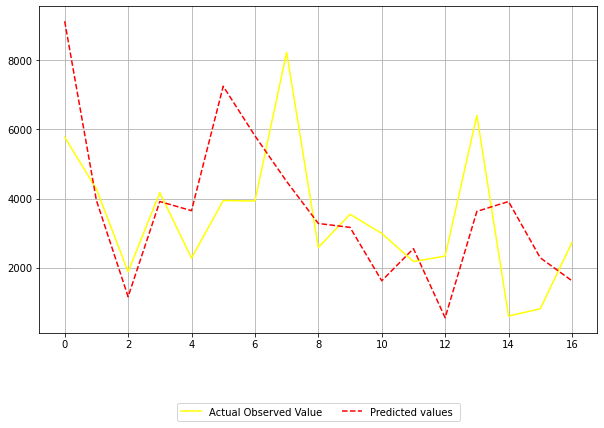

In [58]:
# plotting the observed and predicted values 


# Setting the boundaries and parameters

plt.rcParams['figure.figsize'] = (10,6)
x_ax =range(len(x_test))

#plotting 
plt.plot(x_ax, y_test , label='Actual Observed Value', color='yellow',linestyle='-')
plt.plot(x_ax,y_pred_svm , label='Predicted values ' , color='red' , linestyle ='--')
plt.grid()

plt.legend(bbox_to_anchor =(0.5,-0.2), loc= 'upper center',ncol=2, frameon = True)
plt.show()

In [102]:
!pip install dbn.tensorflow
from dbn.tensorflow import SupervisedDBNClassification

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement dbn.tensorflow (from versions: none)
ERROR: No matching distribution found for dbn.tensorflow


ModuleNotFoundError: ignored

In [99]:
#@title DB Network

"""
"""
from __future__ import print_function, division
import os
import sys
import timeit

import numpy

!pip install theano
import theano
import theano.tensor as T
from theano.sandbox.rng_mrg import MRG_RandomStreams

from sklearn.linear_model import LogisticRegression

!pip install mlp
!pip install rbm
from sklearn.neural_network import MLPRegressor as mlp
from sklearn.neural_network import BernoulliRBM as RBM
from mlp import HiddenLayer
from rbm import RBM


# start-snippet-1
class DBN(object):
    """Deep Belief Network

    A deep belief network is obtained by stacking several RBMs on top of each
    other. The hidden layer of the RBM at layer `i` becomes the input of the
    RBM at layer `i+1`. The first layer RBM gets as input the input of the
    network, and the hidden layer of the last RBM represents the output. When
    used for classification, the DBN is treated as a MLP, by adding a logistic
    regression layer on top.
    """

    def __init__(self, numpy_rng, theano_rng=None, n_ins=784,
                 hidden_layers_sizes=[500, 500], n_outs=10):
        """This class is made to support a variable number of layers.

        :type numpy_rng: numpy.random.RandomState
        :param numpy_rng: numpy random number generator used to draw initial
                    weights

        :type theano_rng: theano.tensor.shared_randomstreams.RandomStreams
        :param theano_rng: Theano random generator; if None is given one is
                           generated based on a seed drawn from `rng`

        :type n_ins: int
        :param n_ins: dimension of the input to the DBN

        :type hidden_layers_sizes: list of ints
        :param hidden_layers_sizes: intermediate layers size, must contain
                               at least one value

        :type n_outs: int
        :param n_outs: dimension of the output of the network
        """

        self.sigmoid_layers = []
        self.rbm_layers = []
        self.params = []
        self.n_layers = len(hidden_layers_sizes)

        assert self.n_layers > 0

        if not theano_rng:
            theano_rng = MRG_RandomStreams(numpy_rng.randint(2 ** 30))

        # allocate symbolic variables for the data

        # the data is presented as rasterized images
        self.x = T.matrix('x')

        # the labels are presented as 1D vector of [int] labels
        self.y = T.ivector('y')
        # end-snippet-1
        # The DBN is an MLP, for which all weights of intermediate
        # layers are shared with a different RBM.  We will first
        # construct the DBN as a deep multilayer perceptron, and when
        # constructing each sigmoidal layer we also construct an RBM
        # that shares weights with that layer. During pretraining we
        # will train these RBMs (which will lead to chainging the
        # weights of the MLP as well) During finetuning we will finish
        # training the DBN by doing stochastic gradient descent on the
        # MLP.

        for i in range(self.n_layers):
            # construct the sigmoidal layer

            # the size of the input is either the number of hidden
            # units of the layer below or the input size if we are on
            # the first layer
            if i == 0:
                input_size = n_ins
            else:
                input_size = hidden_layers_sizes[i - 1]

            # the input to this layer is either the activation of the
            # hidden layer below or the input of the DBN if you are on
            # the first layer
            if i == 0:
                layer_input = self.x
            else:
                layer_input = self.sigmoid_layers[-1].output

            sigmoid_layer = HiddenLayer(rng=numpy_rng,
                                        input=layer_input,
                                        n_in=input_size,
                                        n_out=hidden_layers_sizes[i],
                                        activation=T.nnet.sigmoid)

            # add the layer to our list of layers
            self.sigmoid_layers.append(sigmoid_layer)

            # its arguably a philosophical question...  but we are
            # going to only declare that the parameters of the
            # sigmoid_layers are parameters of the DBN. The visible
            # biases in the RBM are parameters of those RBMs, but not
            # of the DBN.
            self.params.extend(sigmoid_layer.params)

            # Construct an RBM that shared weights with this layer
            rbm_layer = RBM(numpy_rng=numpy_rng,
                            theano_rng=theano_rng,
                            input=layer_input,
                            n_visible=input_size,
                            n_hidden=hidden_layers_sizes[i],
                            W=sigmoid_layer.W,
                            hbias=sigmoid_layer.b)
            self.rbm_layers.append(rbm_layer)

        # We now need to add a logistic layer on top of the MLP
        self.logLayer = LogisticRegression(
            input=self.sigmoid_layers[-1].output,
            n_in=hidden_layers_sizes[-1],
            n_out=n_outs)
        self.params.extend(self.logLayer.params)

        # compute the cost for second phase of training, defined as the
        # negative log likelihood of the logistic regression (output) layer
        self.finetune_cost = self.logLayer.negative_log_likelihood(self.y)

        # compute the gradients with respect to the model parameters
        # symbolic variable that points to the number of errors made on the
        # minibatch given by self.x and self.y
        self.errors = self.logLayer.errors(self.y)

    def pretraining_functions(self, train_set_x, batch_size, k):
        '''Generates a list of functions, for performing one step of
        gradient descent at a given layer. The function will require
        as input the minibatch index, and to train an RBM you just
        need to iterate, calling the corresponding function on all
        minibatch indexes.

        :type train_set_x: theano.tensor.TensorType
        :param train_set_x: Shared var. that contains all datapoints used
                            for training the RBM
        :type batch_size: int
        :param batch_size: size of a [mini]batch
        :param k: number of Gibbs steps to do in CD-k / PCD-k

        '''

        # index to a [mini]batch
        index = T.lscalar('index')  # index to a minibatch
        learning_rate = T.scalar('lr')  # learning rate to use

        # begining of a batch, given `index`
        batch_begin = index * batch_size
        # ending of a batch given `index`
        batch_end = batch_begin + batch_size

        pretrain_fns = []
        for rbm in self.rbm_layers:

            # get the cost and the updates list
            # using CD-k here (persisent=None) for training each RBM.
            # TODO: change cost function to reconstruction error
            cost, updates = rbm.get_cost_updates(learning_rate,
                                                 persistent=None, k=k)

            # compile the theano function
            fn = theano.function(
                inputs=[index, theano.In(learning_rate, value=0.1)],
                outputs=cost,
                updates=updates,
                givens={
                    self.x: train_set_x[batch_begin:batch_end]
                }
            )
            # append `fn` to the list of functions
            pretrain_fns.append(fn)

        return pretrain_fns

    def build_finetune_functions(self, datasets, batch_size, learning_rate):
        '''Generates a function `train` that implements one step of
        finetuning, a function `validate` that computes the error on a
        batch from the validation set, and a function `test` that
        computes the error on a batch from the testing set

        :type datasets: list of pairs of theano.tensor.TensorType
        :param datasets: It is a list that contain all the datasets;
                        the has to contain three pairs, `train`,
                        `valid`, `test` in this order, where each pair
                        is formed of two Theano variables, one for the
                        datapoints, the other for the labels
        :type batch_size: int
        :param batch_size: size of a minibatch
        :type learning_rate: float
        :param learning_rate: learning rate used during finetune stage

        '''

        (train_set_x, train_set_y) = datasets[0]
        (valid_set_x, valid_set_y) = datasets[1]
        (test_set_x, test_set_y) = datasets[2]

        # compute number of minibatches for training, validation and testing
        n_valid_batches = valid_set_x.get_value(borrow=True).shape[0]
        n_valid_batches //= batch_size
        n_test_batches = test_set_x.get_value(borrow=True).shape[0]
        n_test_batches //= batch_size

        index = T.lscalar('index')  # index to a [mini]batch

        # compute the gradients with respect to the model parameters
        gparams = T.grad(self.finetune_cost, self.params)

        # compute list of fine-tuning updates
        updates = []
        for param, gparam in zip(self.params, gparams):
            updates.append((param, param - gparam * learning_rate))

        train_fn = theano.function(
            inputs=[index],
            outputs=self.finetune_cost,
            updates=updates,
            givens={
                self.x: train_set_x[
                    index * batch_size: (index + 1) * batch_size
                ],
                self.y: train_set_y[
                    index * batch_size: (index + 1) * batch_size
                ]
            }
        )

        test_score_i = theano.function(
            [index],
            self.errors,
            givens={
                self.x: test_set_x[
                    index * batch_size: (index + 1) * batch_size
                ],
                self.y: test_set_y[
                    index * batch_size: (index + 1) * batch_size
                ]
            }
        )

        valid_score_i = theano.function(
            [index],
            self.errors,
            givens={
                self.x: valid_set_x[
                    index * batch_size: (index + 1) * batch_size
                ],
                self.y: valid_set_y[
                    index * batch_size: (index + 1) * batch_size
                ]
            }
        )

        # Create a function that scans the entire validation set
        def valid_score():
            return [valid_score_i(i) for i in range(n_valid_batches)]

        # Create a function that scans the entire test set
        def test_score():
            return [test_score_i(i) for i in range(n_test_batches)]

        return train_fn, valid_score, test_score


def test_DBN(finetune_lr=0.1, pretraining_epochs=100,
             pretrain_lr=0.01, k=1, training_epochs=1000,
             dataset='mnist.pkl.gz', batch_size=10):
    """
    Demonstrates how to train and test a Deep Belief Network.

    This is demonstrated on MNIST.

    :type finetune_lr: float
    :param finetune_lr: learning rate used in the finetune stage
    :type pretraining_epochs: int
    :param pretraining_epochs: number of epoch to do pretraining
    :type pretrain_lr: float
    :param pretrain_lr: learning rate to be used during pre-training
    :type k: int
    :param k: number of Gibbs steps in CD/PCD
    :type training_epochs: int
    :param training_epochs: maximal number of iterations ot run the optimizer
    :type dataset: string
    :param dataset: path the the pickled dataset
    :type batch_size: int
    :param batch_size: the size of a minibatch
    """

    #datasets = load_data(dataset)
    datasets =  data_read

    train_set_x, train_set_y = datasets[0]
    valid_set_x, valid_set_y = datasets[1]
    test_set_x, test_set_y = datasets[2]

    # compute number of minibatches for training, validation and testing
    n_train_batches = train_set_x.get_value(borrow=True).shape[0] // batch_size

    # numpy random generator
    numpy_rng = numpy.random.RandomState(123)
    print('... building the model')
    # construct the Deep Belief Network
    dbn = DBN(numpy_rng=numpy_rng, n_ins=28 * 28,
              hidden_layers_sizes=[1000, 1000, 1000],
              n_outs=10)

    # start-snippet-2
    #########################
    # PRETRAINING THE MODEL #
    #########################
    print('... getting the pretraining functions')
    pretraining_fns = dbn.pretraining_functions(train_set_x=train_set_x,
                                                batch_size=batch_size,
                                                k=k)

    print('... pre-training the model')
    start_time = timeit.default_timer()
    # Pre-train layer-wise
    for i in range(dbn.n_layers):
        # go through pretraining epochs
        for epoch in range(pretraining_epochs):
            # go through the training set
            c = []
            for batch_index in range(n_train_batches):
                c.append(pretraining_fns[i](index=batch_index,
                                            lr=pretrain_lr))
            print('Pre-training layer %i, epoch %d, cost ' % (i, epoch), end=' ')
            print(numpy.mean(c, dtype='float64'))

    end_time = timeit.default_timer()
    # end-snippet-2
    print('The pretraining code for file ' + os.path.split(__file__)[1] +
          ' ran for %.2fm' % ((end_time - start_time) / 60.), file=sys.stderr)
    ########################
    # FINETUNING THE MODEL #
    ########################

    # get the training, validation and testing function for the model
    print('... getting the finetuning functions')
    train_fn, validate_model, test_model = dbn.build_finetune_functions(
        datasets=datasets,
        batch_size=batch_size,
        learning_rate=finetune_lr
    )

    print('... finetuning the model')
    # early-stopping parameters

    # look as this many examples regardless
    patience = 4 * n_train_batches

    # wait this much longer when a new best is found
    patience_increase = 2.

    # a relative improvement of this much is considered significant
    improvement_threshold = 0.995

    # go through this many minibatches before checking the network on
    # the validation set; in this case we check every epoch
    validation_frequency = min(n_train_batches, patience / 2)

    best_validation_loss = numpy.inf
    test_score = 0.
    start_time = timeit.default_timer()

    done_looping = False
    epoch = 0

    while (epoch < training_epochs) and (not done_looping):
        epoch = epoch + 1
        for minibatch_index in range(n_train_batches):

            train_fn(minibatch_index)
            iter = (epoch - 1) * n_train_batches + minibatch_index

            if (iter + 1) % validation_frequency == 0:

                validation_losses = validate_model()
                this_validation_loss = numpy.mean(validation_losses, dtype='float64')
                print('epoch %i, minibatch %i/%i, validation error %f %%' % (
                    epoch,
                    minibatch_index + 1,
                    n_train_batches,
                    this_validation_loss * 100.
                    )
                )

                # if we got the best validation score until now
                if this_validation_loss < best_validation_loss:

                    # improve patience if loss improvement is good enough
                    if (this_validation_loss < best_validation_loss *
                            improvement_threshold):
                        patience = max(patience, iter * patience_increase)

                    # save best validation score and iteration number
                    best_validation_loss = this_validation_loss
                    best_iter = iter

                    # test it on the test set
                    test_losses = test_model()
                    test_score = numpy.mean(test_losses, dtype='float64')
                    print(('     epoch %i, minibatch %i/%i, test error of '
                           'best model %f %%') %
                          (epoch, minibatch_index + 1, n_train_batches,
                          test_score * 100.))

            if patience <= iter:
                done_looping = True
                break

    end_time = timeit.default_timer()
    print(('Optimization complete with best validation score of %f %%, '
           'obtained at iteration %i, '
           'with test performance %f %%'
           ) % (best_validation_loss * 100., best_iter + 1, test_score * 100.))
    print('The fine tuning code for file ' + os.path.split(__file__)[1] +
          ' ran for %.2fm' % ((end_time - start_time) / 60.), file=sys.stderr)


if __name__ == '__main__':
    test_DBN()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement rbm (from versions: none)
ERROR: No matching distribution found for rbm


ImportError: ignored

In [59]:
#@title Decision tree
# from sklearn import svm
# from sklearn.tree import DecisionTreeRegressor

# #from sklearn.model_selection import train_test_split
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt


# data_read = pd.read_csv('Zia_upd22.csv')

# X = data_read.iloc[:,0:8].values
# y = data_read.iloc[:,:-1].values
# regressor = DecisionTreeRegressor(random_state =0)
# regressor.fit(X, y)




In [60]:
# # @title Let Us calculate Estimated Cost With Raw Data
# x=regressor.predict([[154,4.2,0.77,2.7,12,22,310000,63]])
# print("Estimated Cost:",x[0]*100000)



In [61]:
# #@title Decision Tree Regression 
# from sklearn.model_selection import train_test_split
# from sklearn import svm
# from sklearn.tree import DecisionTreeRegressor

# #from sklearn.model_selection import train_test_split
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt


# #data_read = pd.read_csv('Zia_upd22.csv')

# #X = data_read.iloc[:,1:8].values
# #y = data_read.iloc[:,-1].values
# #X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.20 )



In [62]:
# X.shape

In [63]:
# print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

In [64]:
# regressor1 = DecisionTreeRegressor().fit(X_train,y_train)

#coefficient of determination 
# print('Training R_sq is : %.2f'% regressor1.score(X_train,y_train))

In [65]:
# For the training model EVALUATION
# from  sklearn.metrics import mean_absolute_error , mean_squared_error, explained_variance_score , r2_score

In [66]:
#Prediction on the training dataset
y_train_pred= regressor1.predict(X_train)
#y_train= regressor1.predict(X_train)

In [67]:
# The r_sq
# print('The r_sq ,is :',r2_score(y_train,y_train_pred))

In [68]:
# The MAE
print('The MAE is :  ', mean_absolute_error(y_train,y_train_pred))

The MAE is :   0.0


In [69]:
  # MSE 
  print('The MSE is :  ', mean_squared_error(y_train,y_train_pred))

The MSE is :   0.0


In [70]:
# RMSE 
print('The RMSE is :', np.sqrt(mean_squared_error(y_train,y_train_pred)))

The RMSE is : 0.0


In [71]:
#Prediction on the testing Data
y_test_pred = regressor1.predict(X_test)
y_test = regressor1.predict(X_test)

Now Calculating r_score 

In [72]:
# The r_sq
print('The r_sq y_test , y_test_pred is: %.2f'% r2_score(y_test,y_test_pred))

The r_sq y_test , y_test_pred is: 1.00


In [73]:
# # plotting the observed and predicted values 


# # Setting the boundaries and parameters

# plt.rcParams['figure.figsize'] = (10,6)
# x_ax =range(len(X_test))

# #plotting 
# plt.plot(x_ax, y_test , label='Actual Observed Value', color='yellow',linestyle='-')
# plt.plot(x_ax,y_test_pred , label='Predicted values ' , color='red' , linestyle ='--')
# plt.grid()
# plt.ylabel('dcscfvfdscd')
# plt.xlabel('fffdcdcscfvfdscd')
# plt.legend(bbox_to_anchor =(0.5,-0.2), loc= 'upper center',ncol=2, frameon = True)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


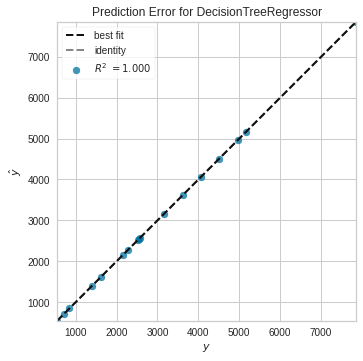

In [74]:
from yellowbrick.regressor import PredictionError 
visualizer = PredictionError(regressor1)
visualizer.fit(X_train, y_train)
visualizer.fit(X_test,y_test)
visualizer.score(X_test,y_test)
visualizer.poof()

In [75]:
# The MAE
print('The MAE is :  ', mean_absolute_error(y_test,y_test_pred ))

The MAE is :   0.0


In [76]:
#pip install yellowbrick

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


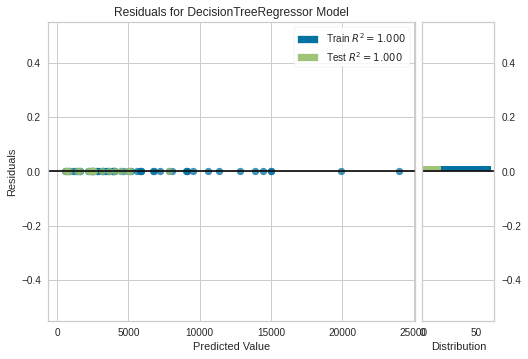

In [77]:
# Residuals plot 
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(regressor1)
visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test)
visualizer.poof()

In [78]:
# testing the Model Evaluation



In [79]:
# MAE 
print('The MAE is :%.2f'% mean_absolute_error(y_test,y_test_pred))

The MAE is :0.00


In [80]:
# The MSE 
print('The MSE is : %.2f'% mean_squared_error(y_test,y_test_pred))

The MSE is : 0.00


In [81]:
print('The RMSE is : %.2f'% np.sqrt(mean_squared_error(y_test,y_test_pred)))

The RMSE is : 0.00


In [82]:
# k-fold cross-validation
from sklearn.model_selection import cross_val_score

In [83]:
#On the training Dataset
from sklearn.model_selection import cross_val_score
score_train = cross_val_score(regressor1,X_train,y_train,scoring = 'neg_mean_squared_error' , cv= 10)

In [84]:
score_train

array([-68184067.        , -18351823.        ,  -7053317.57142857,
       -35027549.28571428, -38115262.5       ,  -8600504.5       ,
       -15387037.16666667, -25333130.66666667, -31870024.66666667,
       -28024529.16666667])

In [85]:
score_train = np.mean(score_train)
print(score_train)

-27594724.552380957


In [86]:
# To make make it Positivme 
from numpy import absolute
score_train = absolute(score_train)
score_train

27594724.552380957

In [87]:
# CV on thee testing data 
score_test = cross_val_score(regressor1, X_test, y_test, scoring ='neg_mean_squared_error' , cv= 5)

In [88]:
print(score_test)

[-10385182.5         -5472203.75        -1506668.33333333
  -3039453.66666667 -27926374.66666667]


In [89]:
#The Mean sCORE 
score_test = np.mean(score_test)
score_test

-9665976.583333334

In [90]:
import pandas as pd
pred_y_diff = pd.DataFrame({'Actual Values of Cost':y_test,'Predicted Cost':y_test_pred,'Difference':y_test-y_test_pred})

pred_y_diff[0:21]

,Actual Values of Cost,Predicted Cost,Difference
0,5152.0,5152.0,0.0
1,1400.0,1400.0,0.0
2,546.0,546.0,0.0
3,7854.0,7854.0,0.0
4,1617.0,1617.0,0.0
5,4067.0,4067.0,0.0
6,4977.0,4977.0,0.0
7,4494.0,4494.0,0.0
8,2520.0,2520.0,0.0
9,3164.0,3164.0,0.0


# Random Forest Regression

In [91]:
# Let us first import The

